<a href="https://colab.research.google.com/github/HieuTranV/DataVisualization/blob/dev/LabCK/Statistic%26Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tải thư viện và dữ liệu

In [1]:
!pip install -q --upgrade scikit-learn category_encoders

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import scipy.stats
from typing import Tuple
warnings.filterwarnings('ignore') 

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn import set_config
set_config(display='diagram') # Để trực quan hóa pipeline

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import xgboost as xgb


In [5]:
data = pd.read_csv('data_update.csv')

In [6]:
data

,Price,Location,Area,Street,Facade,Direction,Saler,Type,Floor,Bathrooms,Bedrooms,Legal Doc
0,4.75 Tỷ - 52.78 Triệu/m²,"Quận Sơn Trà, Thành phố Đà Nẵng",90 m²,Mặt phố - Mặt đường,5m,Đông Bắc,Nhà môi giới,Nhà ở,---,---,2,---
1,Thương lượng,"Thị xã Phổ Yên, Tỉnh Thái Nguyên",120 m²,Mặt phố - Mặt đường,8.5m,---,Sàn bất động sản,Đất - Đất nền - Nhà như đất,---,---,---,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
2,2.2 Tỷ - 56.41 Triệu/m²,"Huyện Hoài Đức, Thành phố Hà Nội",39 m²,Ngõ 1 ô tô,3.5m,Tây,Chính chủ,Đất - Đất nền - Nhà như đất,---,---,---,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
3,770 Triệu - 14 Triệu/m²,"Quận Thanh Xuân, Thành phố Hà Nội",55 m²,Ngõ 1 ô tô,---,---,Chính chủ,"Chung cư, Chung cư mini",---,---,---,"Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Hợp đồng mua bán"
4,890 Triệu - 8.9 Triệu/m²,"Huyện Bàu Bàng, Tỉnh Bình Dương",100 m²,Ngõ 4 ô tô trở lên,5m,Tây,Nhà môi giới,Đất - Đất nền - Nhà như đất,---,---,---,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
...,...,...,...,...,...,...,...,...,...,...,...,...
11934,2.25 Tỷ - 52.33 Triệu/m²,"Quận Ninh Kiều, Thành phố Cần Thơ",43 m²,Ngõ 1 ô tô,6m,Tây Nam,Nhà môi giới,Nhà ở,---,2,2,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
11935,1.1 Tỷ - 33.33 Triệu/m²,"Quận Hà Đông, Thành phố Hà Nội",33 m²,Ngõ 2 ô tô tránh,---,---,Chính chủ,Nhà ở,---,---,---,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
11936,1 Tỷ - 10 Triệu/m²,"Huyện Lục Yên, Tỉnh Yên Bái",100 m²,Mặt phố - Mặt đường,---,---,Nhà môi giới,Đất - Đất nền - Nhà như đất,---,---,---,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
11937,25 Tỷ - 50 Triệu/m²,"Thành phố Vũng Tàu, Tỉnh Bà Rịa - Vũng Tàu",500 m²,Mặt phố - Mặt đường,---,Đông Nam,Nhà môi giới,Đất - Đất nền - Nhà như đất,---,---,---,---


# Khám phá và tiền xử lý cơ bản

In [7]:
data.iloc[5294]

Price                     5 Tỷ - 47.62 Triệu/m²
Location     Thành phố Hạ Long, Tỉnh Quảng Ninh
Area                                     105 m²
Street                         Ngõ 2 ô tô tránh
Facade                                       6m
Direction                                   ---
Saler                              Nhà môi giới
Type              Biệt thự - Song lập - Đơn lập
Floor                                       ---
Bathrooms                                   ---
Bedrooms                                     10
Legal Doc        Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
Name: 5294, dtype: object

In [8]:
# data = data.drop([5294,7581])

In [9]:
data.iloc[6837]

Price                                  4.04 Tỷ - 2.5 Triệu/m²
Location                       Huyện Lương Sơn, Tỉnh Hoà Bình
Area                                                 1,616 m²
Street                                        Ngõ ô tô đỗ cửa
Facade                                                    ---
Direction                                                 ---
Saler                                            Nhà môi giới
Type                              Đất - Đất nền - Nhà như đất
Floor                                                     ---
Bathrooms                                                 ---
Bedrooms                                                  ---
Legal Doc    Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Hợp đồng mua bán
Name: 6837, dtype: object

In [10]:
for name in data.columns:
    data[name].replace('---', np.NaN, inplace=True)

In [11]:
num_row_dup = data.duplicated().sum()
num_row_dup

1185

In [12]:
new_data = data.drop_duplicates()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10754 entries, 0 to 11938
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      10754 non-null  object
 1   Location   10754 non-null  object
 2   Area       10647 non-null  object
 3   Street     9624 non-null   object
 4   Facade     5688 non-null   object
 5   Direction  1948 non-null   object
 6   Saler      10754 non-null  object
 7   Type       10752 non-null  object
 8   Floor      474 non-null    object
 9   Bathrooms  2063 non-null   object
 10  Bedrooms   4747 non-null   object
 11  Legal Doc  9098 non-null   object
dtypes: object(12)
memory usage: 1.1+ MB


In [13]:
new_data = new_data[new_data.Price != 'Thương lượng']
new_data

,Price,Location,Area,Street,Facade,Direction,Saler,Type,Floor,Bathrooms,Bedrooms,Legal Doc
0,4.75 Tỷ - 52.78 Triệu/m²,"Quận Sơn Trà, Thành phố Đà Nẵng",90 m²,Mặt phố - Mặt đường,5m,Đông Bắc,Nhà môi giới,Nhà ở,NaN,NaN,2,NaN
2,2.2 Tỷ - 56.41 Triệu/m²,"Huyện Hoài Đức, Thành phố Hà Nội",39 m²,Ngõ 1 ô tô,3.5m,Tây,Chính chủ,Đất - Đất nền - Nhà như đất,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
3,770 Triệu - 14 Triệu/m²,"Quận Thanh Xuân, Thành phố Hà Nội",55 m²,Ngõ 1 ô tô,NaN,NaN,Chính chủ,"Chung cư, Chung cư mini",NaN,NaN,NaN,"Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Hợp đồng mua bán"
4,890 Triệu - 8.9 Triệu/m²,"Huyện Bàu Bàng, Tỉnh Bình Dương",100 m²,Ngõ 4 ô tô trở lên,5m,Tây,Nhà môi giới,Đất - Đất nền - Nhà như đất,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
5,800 Triệu - 19.51 Triệu/m²,"Huyện Gia Lâm, Thành phố Hà Nội",41 m²,Ngõ ngách,3.6m,NaN,Nhà môi giới,Đất - Đất nền - Nhà như đất,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
...,...,...,...,...,...,...,...,...,...,...,...,...
11934,2.25 Tỷ - 52.33 Triệu/m²,"Quận Ninh Kiều, Thành phố Cần Thơ",43 m²,Ngõ 1 ô tô,6m,Tây Nam,Nhà môi giới,Nhà ở,NaN,2,2,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
11935,1.1 Tỷ - 33.33 Triệu/m²,"Quận Hà Đông, Thành phố Hà Nội",33 m²,Ngõ 2 ô tô tránh,NaN,NaN,Chính chủ,Nhà ở,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
11936,1 Tỷ - 10 Triệu/m²,"Huyện Lục Yên, Tỉnh Yên Bái",100 m²,Mặt phố - Mặt đường,NaN,NaN,Nhà môi giới,Đất - Đất nền - Nhà như đất,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
11937,25 Tỷ - 50 Triệu/m²,"Thành phố Vũng Tàu, Tỉnh Bà Rịa - Vũng Tàu",500 m²,Mặt phố - Mặt đường,NaN,Đông Nam,Nhà môi giới,Đất - Đất nền - Nhà như đất,NaN,NaN,NaN,NaN


In [14]:
new_data[new_data['Price'] == '2,260,000 Tỷ - 29,736.84 Tỷ/m²']

,Price,Location,Area,Street,Facade,Direction,Saler,Type,Floor,Bathrooms,Bedrooms,Legal Doc
7579,"2,260,000 Tỷ - 29,736.84 Tỷ/m²","Thành phố Vũng Tàu, Tỉnh Bà Rịa - Vũng Tàu",76 m²,NaN,NaN,NaN,Nhà môi giới,Chung cư,NaN,NaN,NaN,NaN


In [15]:
regexp = re.compile(r'(\d+[.,]?\d*[,.]?\d*)\s(\w+)\s?-?\s?(\d+[.,]?\d*[,.]?\d*)?\s?(\w+\W\w+)?')
row = '1,500,000 Tỷ - 10,714.29 Tỷ/m²'
matches = regexp.findall(row)
matches

[('1,500,000', 'Tỷ', '10,714.29', 'Tỷ/m²')]

In [16]:
def convert_Price_col(prices):
    list_price = []
    list_price_per_squarem = []
    weird_index = []
    
    for index, price in enumerate(prices):
        pr = float(regexp.sub(r'\1', price).replace(",",""))
        if regexp.sub(r'\2', price) == 'Triệu':
            pr /= 1e3
        pp = regexp.sub(r'\3', price).replace(",","")
        p_unit = regexp.sub(r'\4', price)
        if pp == '':
            pp = np.NaN
        if p_unit != 'Triệu/m²':
            weird_index.append(index)
            if p_unit == 'Tỷ/m²':
                pp = float(pp)*1e3
            elif p_unit == 'Nghìn/m²':
                pp = float(pp)/1e6
        list_price.append(pr)
        list_price_per_squarem.append(float(pp)) 
    return list_price, list_price_per_squarem, weird_index

list_price, list_price_per_squarem, weird_index = convert_Price_col(list(new_data['Price']))

In [17]:
len(weird_index)

342

In [18]:
# for idx in weird_index:
#     print(new_data.iloc[idx]['Price'])

In [19]:
new_data['Price(million/m_square)'] = list_price_per_squarem
new_data['Price'] = list_price

In [20]:
def convert_Area_col(row):
    return float(row[:row.find('m²')].strip().replace(",",""))

new_data['Area'] = new_data['Area'].apply(lambda x : convert_Area_col(x) if x == x else x) 
new_data['Facade'] = new_data['Facade'].apply(lambda x : convert_Area_col(x) if x == x else x) 

- Price: đơn vị tỷ

In [21]:
new_data.tail(5)

,Price,Location,Area,Street,Facade,Direction,Saler,Type,Floor,Bathrooms,Bedrooms,Legal Doc,Price(million/m_square)
11934,2.25,"Quận Ninh Kiều, Thành phố Cần Thơ",43.0,Ngõ 1 ô tô,6.0,Tây Nam,Nhà môi giới,Nhà ở,NaN,2,2,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,52.33
11935,1.10,"Quận Hà Đông, Thành phố Hà Nội",33.0,Ngõ 2 ô tô tránh,NaN,NaN,Chính chủ,Nhà ở,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,33.33
11936,1.00,"Huyện Lục Yên, Tỉnh Yên Bái",100.0,Mặt phố - Mặt đường,NaN,NaN,Nhà môi giới,Đất - Đất nền - Nhà như đất,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,10.00
11937,25.00,"Thành phố Vũng Tàu, Tỉnh Bà Rịa - Vũng Tàu",500.0,Mặt phố - Mặt đường,NaN,Đông Nam,Nhà môi giới,Đất - Đất nền - Nhà như đất,NaN,NaN,NaN,NaN,50.00
11938,8.50,"Quận Hà Đông, Thành phố Hà Nội",46.0,Ngõ 2 ô tô tránh,4.0,NaN,Nhà môi giới,Nhà ở,NaN,3,4,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,184.78


In [22]:
new_data['Floor'] = new_data['Floor'].astype(float)
new_data['Bedrooms'] = new_data['Bedrooms'].astype(float)
new_data['Bathrooms'] = new_data['Bathrooms'].astype(float)

In [23]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10040 entries, 0 to 11938
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    10040 non-null  float64
 1   Location                 10040 non-null  object 
 2   Area                     10007 non-null  float64
 3   Street                   9026 non-null   object 
 4   Facade                   5417 non-null   float64
 5   Direction                1845 non-null   object 
 6   Saler                    10040 non-null  object 
 7   Type                     10040 non-null  object 
 8   Floor                    465 non-null    float64
 9   Bathrooms                1996 non-null   float64
 10  Bedrooms                 4579 non-null   float64
 11  Legal Doc                8541 non-null   object 
 12  Price(million/m_square)  10007 non-null  float64
dtypes: float64(7), object(6)
memory usage: 1.1+ MB


In [24]:
cat_col_df = new_data.select_dtypes(include='object')

def missing_ratio(col):
    return col.isna().mean()*100

def top10_value_counts(col):
    return dict(col.value_counts()[:10])

category_stat = cat_col_df.agg([missing_ratio, pd.Series.nunique, top10_value_counts])
pd.set_option('display.max_colwidth', 1000)
category_stat

,Location,Street,Direction,Saler,Type,Legal Doc
missing_ratio,0,10.0996,81.6235,0,0,14.9303
nunique,300,8,37,8,194,15
top10_value_counts,"{'Quận Hà Đông, Thành phố Hà Nội': 630, 'Quận Đống Đa, Thành phố Hà Nội': 562, 'Quận Thanh Xuân, Thành phố Hà Nội': 513, 'Quận Cầu Giấy, Thành phố Hà Nội': 434, 'Quận Hoàng Mai, Thành phố Hà Nội': 361, 'Quận Bắc Từ Liêm, Thành phố Hà Nội': 354, 'Quận Hai Bà Trưng, Thành phố Hà Nội': 304, 'Quận Long Biên, Thành phố Hà Nội': 292, 'Thành phố Vũng Tàu, Tỉnh Bà Rịa - Vũng Tàu': 272, 'Quận Tây Hồ, Thành phố Hà Nội': 267}","{'Mặt phố - Mặt đường': 3329, 'Ngõ ô tô đỗ cửa': 1497, 'Ngõ 2 ô tô tránh': 1454, 'Ngõ ngách': 1445, 'Ngõ 1 ô tô': 1062, 'Ngõ 3 ô tô tránh': 174, 'Ngõ 4 ô tô trở lên': 45, 'Ngõ 4 ô tô tránh': 20}","{'Đông Nam': 365, 'Đông Bắc': 234, 'Tây Nam': 224, 'Tây Bắc': 221, 'Nam': 179, 'Đông': 136, 'Bắc': 117, 'Đông Tứ Trạch': 108, 'Tây Tứ Trạch': 81, 'Tây': 75}","{'Nhà môi giới': 7752, 'Chính chủ': 1839, 'Khách vãng lai': 181, 'Sàn bất động sản': 105, 'Chủ đầu tư': 98, 'Quảng cáo': 37, 'Nhà đầu tư': 27, 'Ngân Hàng': 1}","{'Nhà ở': 4719, 'Đất - Đất nền - Nhà như đất': 2684, 'Chung cư': 814, 'Biệt thự - Song lập - Đơn lập': 276, 'Nhà liền kề - Song lập - Đơn lập': 181, 'Shophouse - Nhà phố': 125, 'Nhà cấp 4': 120, 'Chung cư mini': 102, 'Nhà ở, Nhà liền kề - Song lập - Đơn lập': 51, 'Nhà ở, Đất - Đất nền - Nhà như đất': 48}","{'Giấy CN QSDĐ - Sổ đỏ - Sổ hồng': 8050, 'Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Hợp đồng mua bán': 314, 'Hợp đồng mua bán': 145, 'Đang làm giấy CN QSDĐ': 6, 'Đã có giấy hẹn lấy số': 5, 'Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Hợp đồng mua bán, Giấy tờ chứng minh nguồn gốc': 5, 'Hợp đồng góp vốn': 4, 'Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Hợp đồng mua bán, Hợp đồng góp vốn': 3, 'Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Giấy tờ chứng minh nguồn gốc': 2, 'Đất giao - Đất phân': 2}"


In [25]:
numeric_cols_df = new_data.select_dtypes(exclude='object')

def median(col):
    return col.quantile(0.5)

def lower_quantile(col):
    return col.quantile(0.25)

def upper_quantile(col):
    return col.quantile(0.75)

numeric_cols_df.agg([missing_ratio, min, median, lower_quantile, upper_quantile,max])

,Price,Area,Facade,Floor,Bathrooms,Bedrooms,Price(million/m_square)
missing_ratio,0.000000e+00,0.328685,46.045817,95.368526,80.119522,54.39243,3.286853e-01
min,1.000000e-03,1.200000,1.000000,1.000000,1.000000,1.00000,1.280000e-06
median,3.600000e+00,72.000000,5.000000,4.000000,3.000000,3.00000,6.650000e+01
lower_quantile,1.870000e+00,46.000000,4.000000,3.000000,2.000000,2.00000,1.900000e+01
upper_quantile,6.500000e+00,118.000000,6.000000,5.000000,4.000000,4.00000,1.095050e+02
max,1.130000e+09,500000.000000,613.000000,50.000000,50.000000,111.00000,1.113000e+08


In [26]:
# new_data.drop(new_data.index[new_data['Price'] == 3.750000e+09], inplace = True)

In [27]:
new_data.shape

(10040, 13)

In [28]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10040 entries, 0 to 11938
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    10040 non-null  float64
 1   Location                 10040 non-null  object 
 2   Area                     10007 non-null  float64
 3   Street                   9026 non-null   object 
 4   Facade                   5417 non-null   float64
 5   Direction                1845 non-null   object 
 6   Saler                    10040 non-null  object 
 7   Type                     10040 non-null  object 
 8   Floor                    465 non-null    float64
 9   Bathrooms                1996 non-null   float64
 10  Bedrooms                 4579 non-null   float64
 11  Legal Doc                8541 non-null   object 
 12  Price(million/m_square)  10007 non-null  float64
dtypes: float64(7), object(6)
memory usage: 1.1+ MB


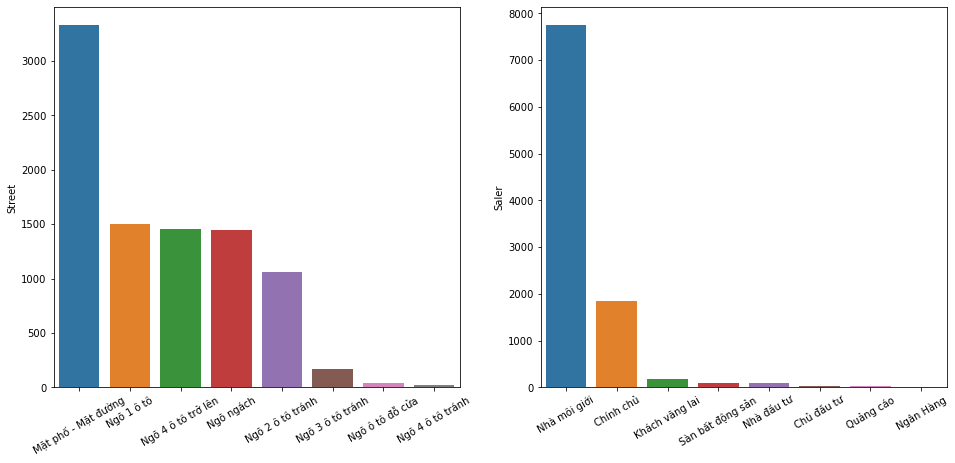

In [29]:
fig, ax = plt.subplots(1,2,figsize=(16,7))
sns.barplot(x=new_data['Street'].dropna().unique(),y =new_data['Street'].value_counts(), ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=30)
sns.barplot(x=new_data['Saler'].dropna().unique(),y =new_data['Saler'].value_counts(), ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=30)
plt.show()

In [30]:
new_data['Street'].value_counts()

Mặt phố - Mặt đường    3329
Ngõ ô tô đỗ cửa        1497
Ngõ 2 ô tô tránh       1454
Ngõ ngách              1445
Ngõ 1 ô tô             1062
Ngõ 3 ô tô tránh        174
Ngõ 4 ô tô trở lên       45
Ngõ 4 ô tô tránh         20
Name: Street, dtype: int64

In [31]:
# dict(new_data['Type'].value_counts())

In [32]:
new_data.Type.replace(['Chung cư, Chung cư mini', 'Chung cư, Chung cư mini', 'Biệt thự - Song lập - Đơn lập','Biệt thự du lịch','Nhà cấp 4'],\
                        ['Chung cư mini','Chung cư mini', 'Biệt thự','Biệt thự','Nhà ở' ],inplace=True)

In [33]:
list_type = list(new_data['Type'])
for i in range(len(list_type)):
    list_type[i] = list_type[i].split(',')[0]

In [34]:
new_data['Type'] = list_type

In [35]:
len(new_data['Type'].value_counts())

25

In [36]:
dict(new_data['Type'].value_counts())

{'Nhà ở': 5263,
 'Đất - Đất nền - Nhà như đất': 2786,
 'Chung cư': 856,
 'Biệt thự': 276,
 'Nhà liền kề - Song lập - Đơn lập': 191,
 'Chung cư mini': 155,
 'Shophouse - Nhà phố': 137,
 'Biệt thự - Song lập - Đơn lập': 83,
 'Nhà cấp 4': 71,
 'Khách sạn - Nhà nghỉ': 34,
 'Bất động sản khác': 33,
 'Phòng trọ/ Nhà trọ': 29,
 'Dự án BĐS - Khu nghỉ dưỡng - Resort': 23,
 'Mặt bằng thương mại': 21,
 'Toà nhà văn phòng': 18,
 'Căn hộ du lịch - Condotel': 14,
 'Kho bãi - Nhà xưởng': 10,
 'Tập thể': 9,
 'Căn hộ cho thuê': 9,
 'Nhà hàng - Cửa hàng - Ki ốt': 6,
 'Trang trại': 5,
 'Căn hộ dịch vụ - Homestay': 5,
 'Biệt thự du lịch': 3,
 'Sàn văn phòng': 2,
 'Karaoke': 1}

In [37]:
new_data[new_data['Type']=='Biệt thự - Song lập - Đơn lập']

,Price,Location,Area,Street,Facade,Direction,Saler,Type,Floor,Bathrooms,Bedrooms,Legal Doc,Price(million/m_square)
182,31.000,"Quận Tây Hồ, Thành phố Hà Nội",140.0,Mặt phố - Mặt đường,NaN,NaN,Nhà môi giới,Biệt thự - Song lập - Đơn lập,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,221.43
297,11.600,"Huyện Đông Anh, Thành phố Hà Nội",108.0,Mặt phố - Mặt đường,NaN,NaN,Nhà môi giới,Biệt thự - Song lập - Đơn lập,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,107.41
357,2.400,"Thành phố Bến Tre, Tỉnh Bến Tre",90.0,Mặt phố - Mặt đường,4.5,NaN,Nhà môi giới,Biệt thự - Song lập - Đơn lập,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,26.67
363,0.724,"Thành phố Bến Tre, Tỉnh Bến Tre",50.0,Mặt phố - Mặt đường,NaN,NaN,Nhà môi giới,Biệt thự - Song lập - Đơn lập,NaN,NaN,2.0,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,14.48
399,4.200,"Huyện Hoài Đức, Thành phố Hà Nội",100.0,Ngõ 2 ô tô tránh,NaN,NaN,Nhà môi giới,Biệt thự - Song lập - Đơn lập,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,42.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11088,6.800,"Quận Đống Đa, Thành phố Hà Nội",80.0,Ngõ ngách,4.0,Đông Bắc,Nhà môi giới,Biệt thự - Song lập - Đơn lập,NaN,3.0,4.0,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,85.00
11228,3.500,"Thành phố Sóc Trăng, Tỉnh Sóc Trăng",270.0,Mặt phố - Mặt đường,NaN,NaN,Nhà môi giới,Biệt thự - Song lập - Đơn lập,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,12.96
11251,28.000,"Quận Thanh Xuân, Thành phố Hà Nội",157.0,Ngõ 3 ô tô tránh,NaN,NaN,Nhà môi giới,Biệt thự - Song lập - Đơn lập,NaN,8.0,6.0,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,178.34
11291,3.500,"Thị xã Thái Hòa, Tỉnh Nghệ An",138.0,Ngõ 2 ô tô tránh,NaN,NaN,Chính chủ,Biệt thự - Song lập - Đơn lập,NaN,NaN,NaN,NaN,25.36


1 - Chung cư thường phân bổ ở những tỉnh thành nào? giải thích? <br>
2 - Các chung cư có nhiều phòng ngủ sẽ có giá cao hơn đúng không? <br>
3 - Diện tích các căn chung cư 1 phòng ngủ thường dưới 50 mét vuông đúng không? <br>
4 - Nhà ở TP Hồ Chí Minh được bán nhiều hơn bởi Nhà môi giới hay chính chủ hay thông qua sàn giao dịch?<br>
5 - Giá chung cư chưa có giấy tờ sẽ thấp hơn chung cư dã có giấy tờ?<br>
6 - Nhà được bán bởi chính chú thường có giá thấp hơn nhà bán bởi nhà môi giới?<br>
7 - Tại sao số bất động sản ở TP Hồ Chí Minh/Hà Nội lại nhiều hơn các tỉnh khác?<br>
8 - Đất nền hay chugn cư có giá cao hơn?<br>
9 - Những hơi nhiều đất nền thì ít chung cư và ngược lại đúng không ? Giải thích?<br>
10 - Diện tích nhà ở trung bình của TP HCM nhỏ hơn Hà Nội đúng không?<br>
11 - Phần lớn BĐS rao bán ở các TP?<br>
12 - Giá trung bình biệt thự là bao nhiêu?<br>
13 - Biệt thự thường tập trung ở các khu vực nào? Tại sao?<br>
14 - Nhà ở ở đường lớn có giá cao hơn nhà ở trong ngõ?<br>
15 - Nhà ở mặt phố thường có diện tích lớn hơn nhà ở trong ngõ?<br>
16 - Nhà có nhiều phòng ngủ sẽ có nhiều nhà vệ sinh?<br>
17 - Tại sao các tỉnh thành xung quanh TPHCM/HN thường bán nhà hoặc đất nền ? Giải thích?<br>
18 - Tỉ lệ thành phần các loại bất động sản ở HCM, HN, ĐN<br>
19 - Mỗi loại bất động sản ở quận 10, tphcm có giá trị tầm bn??<br>
20 - Giá trị trung bình chung cư 2 phòng ngủ giữa các quận ở HCM<br>
21 - Nơi nào ở hcm có nhu cầu giao dịch bất động sản nhiều nhất? lí giải<br>
22 - Mặt tiền ở thành phố bảo lộc (có thể dùng để mở cửa hàng) có giá trị bn?<br>
23 - Bạn có khoảng 5 tỷ ở SG, và bạn quyết tâm về quê chăn gà, và bạn quyết tâm về tây nguyên start up, nên mua đất nền ở đâu<br>

# Trả  lời một số câu hỏi bằng trực quan hóa

 ### Tỉ lệ thành phần các loại bất động sản ở HCM, HN, ĐN

In [38]:
hn_df = new_data.loc[(new_data['Location'].str.contains('Hà Nội'))]
replace_type = hn_df['Type'].value_counts().keys()[6:]

for val in replace_type:
    hn_df.loc[hn_df['Type'] == val, :] = 'Bất động sản khác'

In [39]:
dn_df = new_data.loc[(new_data['Location'].str.contains('Đà Nẵng'))]
replace_type = dn_df['Type'].value_counts().keys()[6:]

for val in replace_type:
    dn_df.loc[dn_df['Type'] == val, :] = 'Bất động sản khác'

In [40]:
hcm_df = new_data.loc[(new_data['Location'].str.contains('Hồ Chí Minh'))]
replace_type = hcm_df['Type'].value_counts().keys()[6:]

for val in replace_type:
    hcm_df.loc[hcm_df['Type'] == val, :] = 'Bất động sản khác'

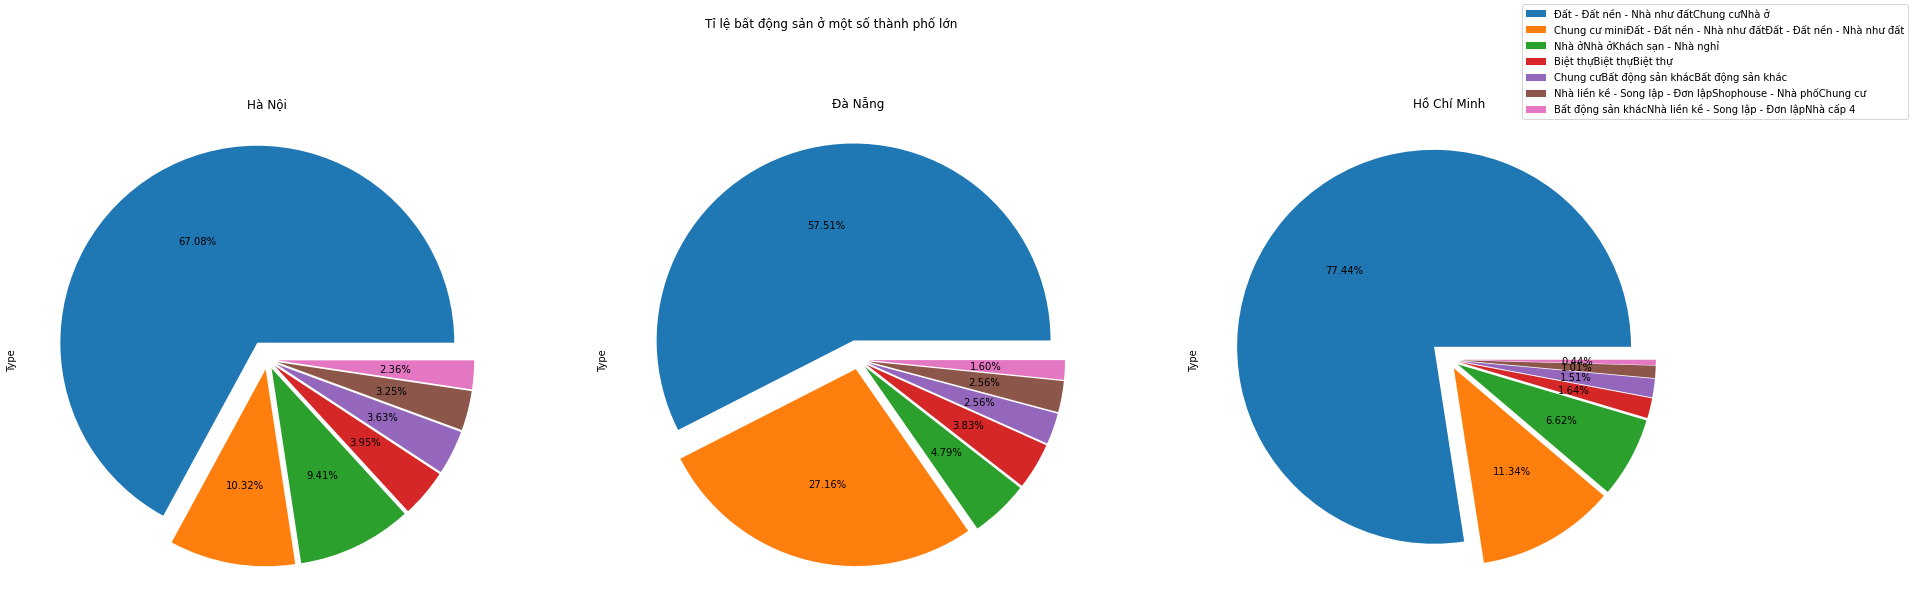

In [41]:
fig, axs = plt.subplots(1,3, figsize=(30,10))
explode = (0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
labels = pd.Series(hn_df['Type'].unique() + hcm_df['Type'].unique()+ dn_df['Type'].unique()).unique()

hn_df['Type'].value_counts().plot.pie(labels=None, autopct='%1.2f%%', ax=axs[0], explode=explode, title='Hà Nội')
dn_df['Type'].value_counts().plot.pie(labels=None, autopct='%1.2f%%', ax=axs[1], explode=explode, title='Đà Nẵng')
hcm_df['Type'].value_counts().plot.pie(labels=None, autopct='%1.2f%%', ax=axs[2], explode=explode, title='Hồ Chí Minh')
fig.legend(labels)
fig.suptitle("Tỉ lệ bất động sản ở một số thành phố lớn")
plt.show()

## Nhà có nhiều phòng ngủ sẽ có nhiều nhà tắm?

In [42]:
df = new_data.loc[(new_data['Type'].str.contains('Nhà ở')) | (new_data['Type'].str.contains('Chung cư')), ('Bathrooms', 'Bedrooms', 'Price(million/m_square)')]
df.fillna(df.mean(), inplace=True)
df

,Bathrooms,Bedrooms,Price(million/m_square)
0,3.517982,2.000000,52.78
3,3.517982,3.990226,14.00
6,3.517982,3.990226,37.25
9,3.517982,3.990226,11.79
10,4.000000,3.000000,86.67
...,...,...,...
11932,3.000000,2.000000,99.09
11933,3.517982,3.000000,47.67
11934,2.000000,2.000000,52.33
11935,3.517982,3.990226,33.33


In [43]:
def corr(x,y):
    slope, intercept, r,p, stderr = scipy.stats.linregress(x, y)
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x,r={r:.2f}'
    print(scipy.stats.kendalltau(x, y))
    fig, ax=plt.subplots(figsize=(8, 6))
    ax.plot(x,y,linewidth=0, marker='s', label='Data points')
    ax.plot(x, intercept + slope * x,label=line)
    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)
    ax.legend(facecolor='white')
    plt.show()


KendalltauResult(correlation=0.3404736179589722, pvalue=5.2841829154121684e-226)


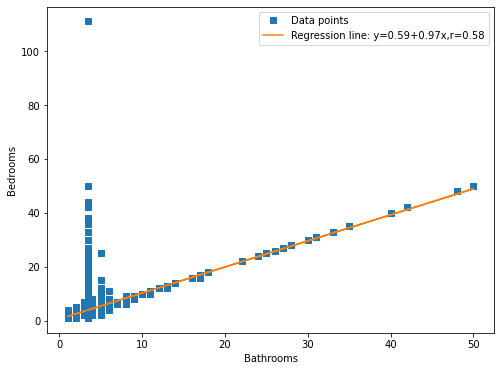

In [44]:
corr(df['Bathrooms'], df['Bedrooms'])

$\rightarrow$ Dựa vào kết quả trên, ta có thể kết luận hai biến trên có mối quan hệ tương quan ở mức trung bình, không đủ để kết luận quan điểm ở trên.

In [45]:
new_data.isna().sum()

Price                         0
Location                      0
Area                         33
Street                     1014
Facade                     4623
Direction                  8195
Saler                         0
Type                          0
Floor                      9575
Bathrooms                  8044
Bedrooms                   5461
Legal Doc                  1499
Price(million/m_square)      33
dtype: int64

## So sánh giá bất động sản ở Hà Nội và TP Hồ Chí Minh. 

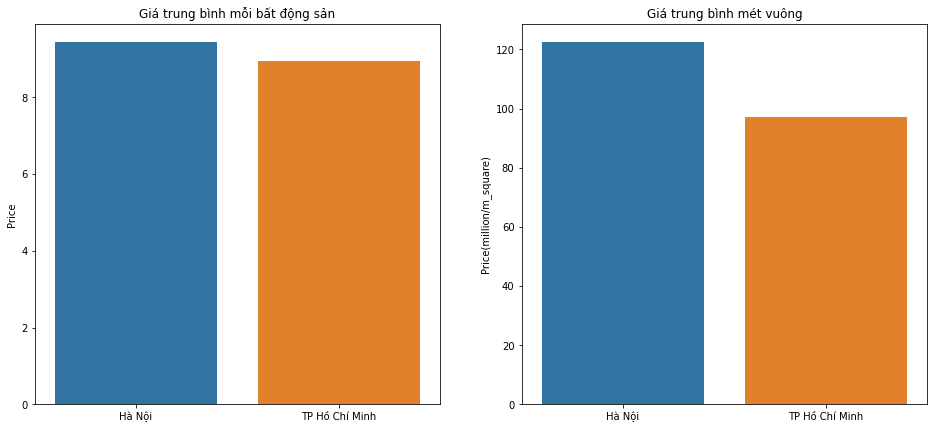

In [46]:
data_hanoi = new_data[new_data['Location'].str.contains("Hà Nội")]
data_hcm = new_data[new_data['Location'].str.contains("Hồ Chí Minh")]
data_hanoi['City'] = 'Hà Nội'
data_hcm['City'] = 'TP Hồ Chí Minh'
frames = [data_hanoi, data_hcm]
result_df = pd.concat(frames)

fig, ax = plt.subplots(1,2,figsize=(16,7))
sns.barplot(x=result_df['City'].dropna().unique(),y =result_df.groupby(['City']).mean()['Price'], ax=ax[0]).set_title('Giá trung bình mỗi bất động sản')
sns.barplot(x=result_df['City'].dropna().unique(),y =result_df.groupby(['City']).mean()['Price(million/m_square)'], ax=ax[1]).set_title('Giá trung bình mét vuông')
plt.show()

Giá nhà trung bình ở thành phố Hồ Chí Minh rẻ hơn so với Hà Nội. Mức giá trung bình mỗi bất động sản ở Hà Nội và Thành phố Hồ Chí Minh không có sự chênh lệch nhiều. Nhưng giá tiền trên mỗi mét vuông ở Hà Nội cao hơn TP Hồ Chí Minh khá nhiều

## So sánh nhà ở ở Hà Nội và TP Hồ Chí Minh.

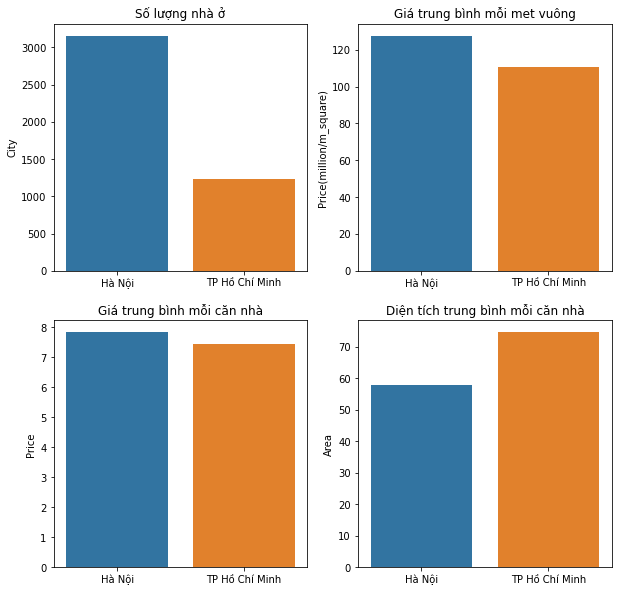

In [47]:
data_hanoi = new_data[new_data['Location'].str.contains("Hà Nội")]
data_hanoi = data_hanoi[new_data['Type'] == 'Nhà ở']
data_hcm = new_data[new_data['Location'].str.contains("Hồ Chí Minh")]
data_hcm = data_hcm[new_data['Type'] == 'Nhà ở']
data_hanoi['City'] = 'Hà Nội'
data_hcm['City'] = 'TP Hồ Chí Minh'
frames = [data_hanoi, data_hcm]
result_df = pd.concat(frames)

fig, ax = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x=result_df['City'].unique(),y =result_df['City'].value_counts(), ax=ax[0][0]).set_title('Số lượng nhà ở')
sns.barplot(x=result_df['City'].unique(),y =result_df.groupby(['City']).mean()['Price(million/m_square)'], ax=ax[0][1]).set_title('Giá trung bình mỗi met vuông')
sns.barplot(x=result_df['City'].unique(),y =result_df.groupby(['City']).mean()['Price'], ax=ax[1][0]).set_title('Giá trung bình mỗi căn nhà')
sns.barplot(x=result_df['City'].unique(),y =result_df.groupby(['City']).mean()['Area'], ax=ax[1][1]).set_title('Diện tích trung bình mỗi căn nhà')
plt.show()

- Số bất động sản nhà ở ở Hà Nội cao hon rất nhiều so với TP Hồ Chí Minh. 
- Giá nhà trung bình ở TP Hồ Chí Minh cũng rẻ hơn khá nhiều so với Hà Nội.
- Giá trung bình mỗi căn nhà ở Hà Nội cao hơn TP Hồ Chí Minh
- Diện tích mỗi căn nhà ở Hà Nội nhỏ hơn TP Hồ Chí Minh
==> Kết luận: Giá nhà ở ở Hà Nội khá cao và cao hơn TP Hồ Chí Minh. Điều này khiến các nhà ở có diện tích nhỏ hơn được cung cấp để tiếp cận đến đối tượng khách có nguồn tài chính hạn chế hơn.


## So sánh căn hộ ở Hà Nội và TP Hồ Chí Minh.

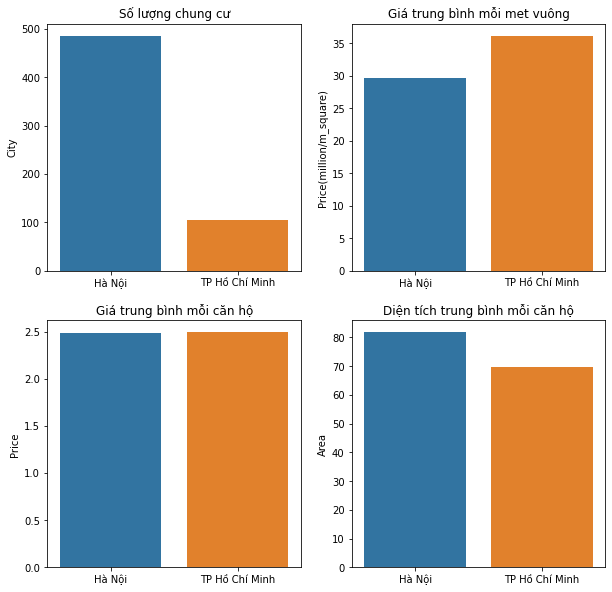

,Price,Location,Area,Street,Facade,Direction,Saler,Type,Floor,Bathrooms,Bedrooms,Legal Doc,Price(million/m_square),City


In [48]:
data_hanoi = new_data[new_data['Location'].str.contains("Hà Nội")]
data_hanoi = data_hanoi[new_data['Type'] == 'Chung cư']
data_hcm = new_data[new_data['Location'].str.contains("Hồ Chí Minh")]
data_hcm = data_hcm[new_data['Type'] == 'Chung cư']
data_hanoi['City'] = 'Hà Nội'
data_hcm['City'] = 'TP Hồ Chí Minh'
frames = [data_hanoi, data_hcm]
result_df = pd.concat(frames)

fig, ax = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x=result_df['City'].unique(),y =result_df['City'].value_counts(), ax=ax[0][0]).set_title('Số lượng chung cư')
sns.barplot(x=result_df['City'].unique(),y =result_df.groupby(['City']).mean()['Price(million/m_square)'], ax=ax[0][1]).set_title('Giá trung bình mỗi met vuông')
sns.barplot(x=result_df['City'].unique(),y =result_df.groupby(['City']).mean()['Price'], ax=ax[1][0]).set_title('Giá trung bình mỗi căn hộ')
sns.barplot(x=result_df['City'].unique(),y =result_df.groupby(['City']).mean()['Area'], ax=ax[1][1]).set_title('Diện tích trung bình mỗi căn hộ')
plt.show()
data_hcm[new_data['Area']> 300]

- Số căn hộ ở Hà Nội cao hon rất nhiều so với TP Hồ Chí Minh. 
- Giá nhà trung bình ở TP Hồ Chí Minh cao hơn khá nhiều so với Hà Nội.
- Giá trung bình mỗi căn nhà ở Hà Nội và TP Hồ Chí Minh xấp xỉ nhau.
- Diện tích mỗi căn nhà ở Hà Nội lớn hơn TP Hồ Chí Minh.


+ Kết luận: Thị trường căn hộ ở Hà Nội chưa phát triển bằng TP Hồ Chí Minh dù sở hữu nguồn cung dồi dào hơn. Loại hình căn hộ ở Hà Nội không được yêu thích bằng ở TP Hồ Chí Minh. Điều này khiến giá căn hộ ở Hà Nội thấp hơn. 
    

## So sánh bất động sản ở trung tâm Hà Nội và trung tâm TP Hồ Chí Minh

Các quận trung tâm ở Hà Nội: quận Hoàn Kiếm, quận Ba Đình, quận Đống Đa, quận Hai Bà Trưng
Các quận trung tam ở TP Hồ Chí Minh: Quận 1, quận 3, quận 4, quận 5, quận Bình Thạnh, quận Tân Bình

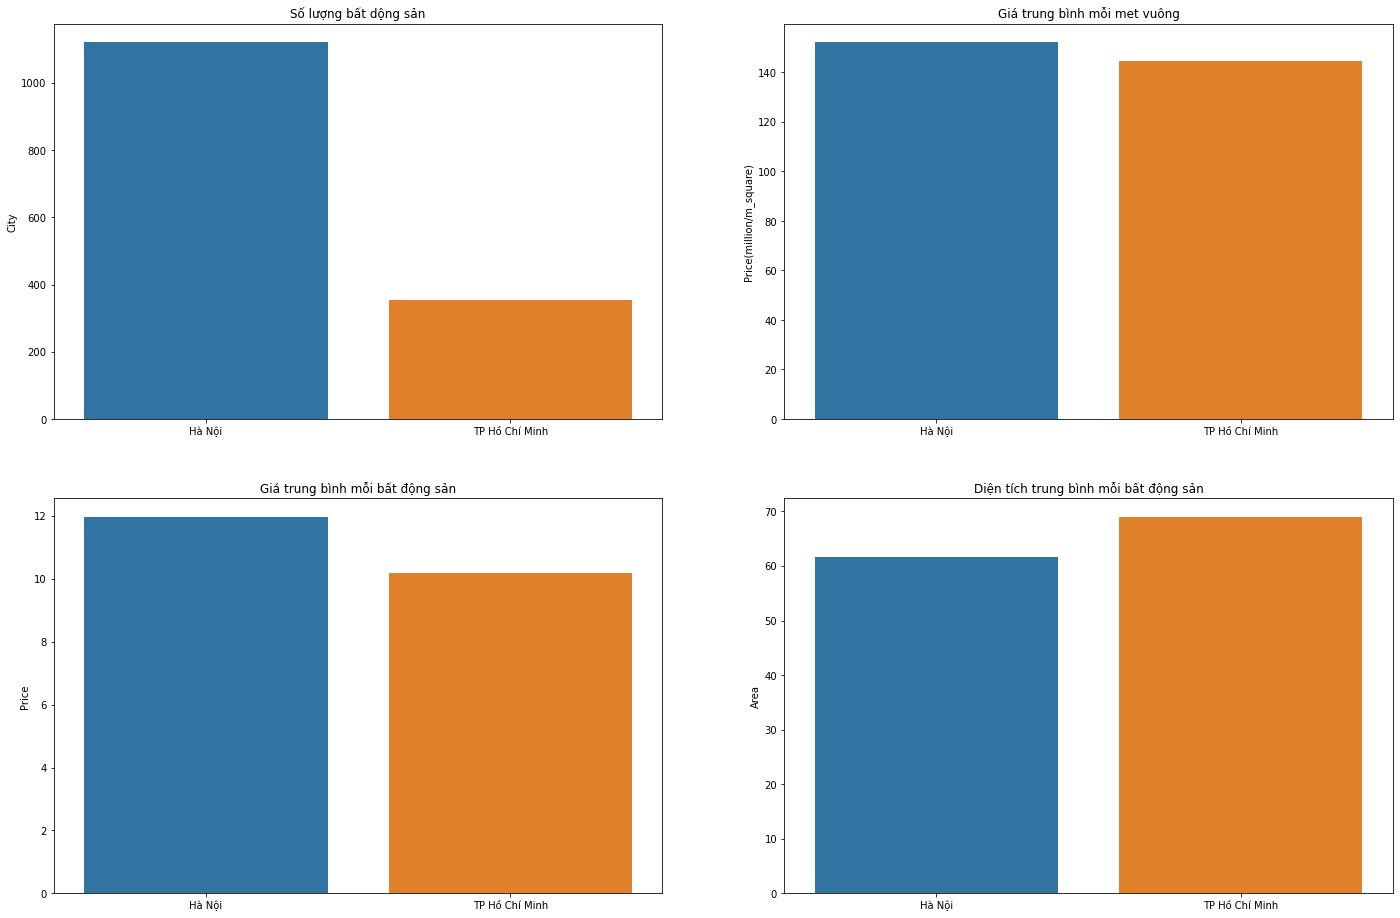

In [49]:
data_hoankiem = new_data[new_data['Location'].str.contains("Hoàn Kiếm")]
data_badinh = new_data[new_data['Location'].str.contains("Ba Đình")]
data_dongda = new_data[new_data['Location'].str.contains("Đống Đa")]
data_haibatrung = new_data[new_data['Location'].str.contains("Hai Bà Trưng")]

data_quan1 = new_data[new_data['Location'].str.contains("Quận 1,")]
data_quan3 = new_data[new_data['Location'].str.contains("Quận 3,")]
data_quan4 = new_data[new_data['Location'].str.contains("Quận 4,")]
data_quan5 = new_data[new_data['Location'].str.contains("Quận 5,")]
data_binhthanh = new_data[new_data['Location'].str.contains("Bình Thạnh")]
data_tanbinh = new_data[new_data['Location'].str.contains("Tân Bình")]

data_hoankiem['City'] ='Hà Nội'
data_badinh['City'] ='Hà Nội'
data_dongda['City'] ='Hà Nội'
data_haibatrung['City'] ='Hà Nội'

data_quan1['City'] = 'TP Hồ Chí Minh'
data_quan3['City'] = 'TP Hồ Chí Minh'
data_quan4['City'] = 'TP Hồ Chí Minh'
data_quan5['City'] = 'TP Hồ Chí Minh'
data_binhthanh['City'] = 'TP Hồ Chí Minh'
data_tanbinh['City'] = 'TP Hồ Chí Minh'

frames = [data_hoankiem, data_badinh, data_dongda, data_haibatrung, data_quan1, data_quan3, data_quan4, data_quan5, data_binhthanh, data_tanbinh]
result_df = pd.concat(frames)

frames_hanoi = [data_hoankiem, data_badinh, data_dongda, data_haibatrung];
df_hanoi = pd.concat(frames_hanoi)
frames_hcm = [data_quan1, data_quan3, data_quan4, data_quan5, data_binhthanh, data_tanbinh]
df_hcm = pd.concat(frames_hcm)

fig, ax = plt.subplots(2,2,figsize=(24,16))
sns.barplot(x=result_df['City'].unique(),y =result_df['City'].value_counts(), ax=ax[0][0]).set_title('Số lượng bất dộng sản')
sns.barplot(x=result_df['City'].unique(),y =result_df.groupby(['City']).mean()['Price(million/m_square)'], ax=ax[0][1]).set_title('Giá trung bình mỗi met vuông')
sns.barplot(x=result_df['City'].unique(),y =result_df.groupby(['City']).mean()['Price'], ax=ax[1][0]).set_title('Giá trung bình mỗi bất động sản')
sns.barplot(x=result_df['City'].unique(),y =result_df.groupby(['City']).mean()['Area'], ax=ax[1][1]).set_title('Diện tích trung bình mỗi bất động sản')
plt.show()


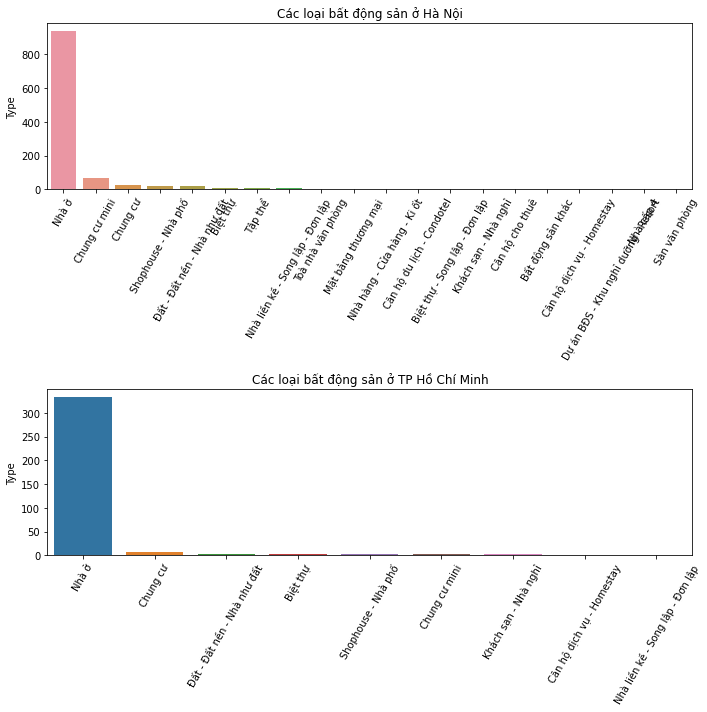

In [50]:
fig, ax = plt.subplots(2,1,figsize=(10,10))
sns.barplot(x=df_hanoi['Type'].dropna().value_counts().index.tolist(),y =df_hanoi['Type'].value_counts(), ax=ax[0]).set_title('Các loại bất động sản ở Hà Nội')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=60)
sns.barplot(x=df_hcm['Type'].dropna().value_counts().index.tolist(),y =df_hcm['Type'].value_counts(), ax=ax[1]).set_title('Các loại bất động sản ở TP Hồ Chí Minh')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=60)
plt.tight_layout()
plt.show()

- Số bất động sản ở Hà Nội cao hơn rất nhiều so với TP Hồ Chí Minh. 
- Giá BĐS trung bình ở trung tâm Hà Nội cao hơn không đáng kể so với trung tâm TP Hồ Chí Minh.
- Giá trung bình mỗi BĐS ở trung tâm Hà Nội cao hơn.
- Diện tích mỗi căn nhà ở Hà Nội lớn hơn TP Hồ Chí Minh.


+ Kết luận: Thị trường bất động sản ở trung tâm của 2 thành phố đều rất phát triển. Tuy nhiên, bất động sản ở trung tâm Hà Nội phát triển hơn còn trung tâm TP Hồ Chí Minh còn nhiều cơ hội phát triển hơn Hà Nội trong tương lai

    

## So sánh bất động sản ở vùng ven Hà Nội và vùng ven TP Hồ Chí Minh

Các quận trung tâm ở Hà Nội: Nam Từ Liêm, Bắc Từ Liêm, Hà Đông, Hoàng Mai, Long Biên
Các quận trung tam ở TP Hồ Chí Minh: Quận 2, quận 7, quận 9, quận 12, quận Bình Tân, quận Thủ Đức

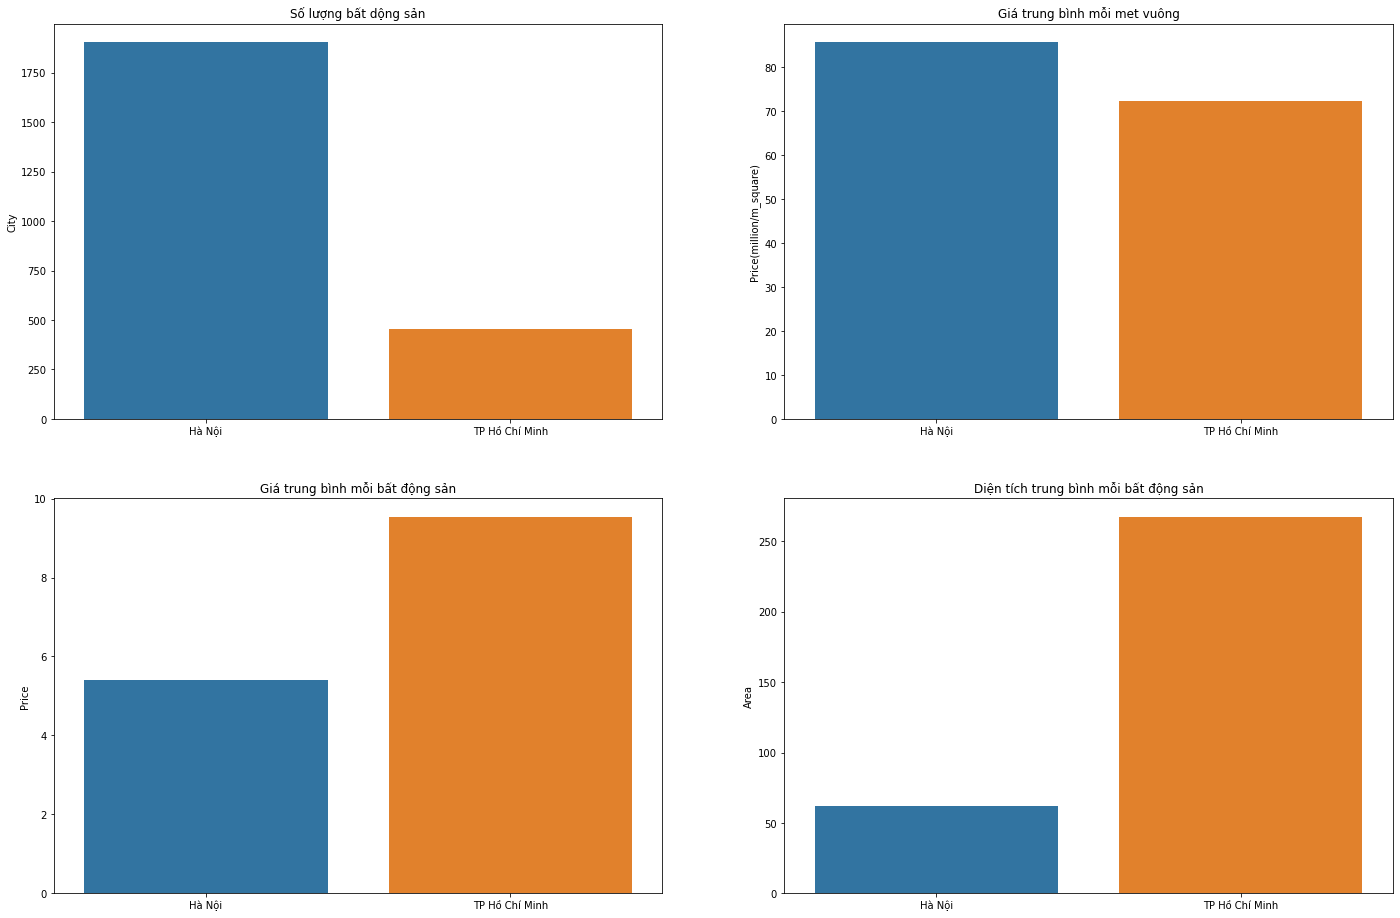

In [51]:
data_namtuliem = new_data[new_data['Location'].str.contains("Nam Từ Liêm")]
data_bactuliem = new_data[new_data['Location'].str.contains("Bắc Từ Liêm")]
data_hadong = new_data[new_data['Location'].str.contains("Hà Đông")]
data_hoangmai = new_data[new_data['Location'].str.contains("Hoàng Mai")]
data_longbien = new_data[new_data['Location'].str.contains("Long Biên")]

data_quan2 = new_data[new_data['Location'].str.contains("Quận 2,")]
data_quan7 = new_data[new_data['Location'].str.contains("Quận 7,")]
data_quan9 = new_data[new_data['Location'].str.contains("Quận 9,")]
data_quan12 = new_data[new_data['Location'].str.contains("Quận 12,")]
data_binhtan = new_data[new_data['Location'].str.contains("Bình Tân")]
data_thuduc = new_data[new_data['Location'].str.contains("Thủ Đức")]

data_namtuliem['City'] ='Hà Nội'
data_bactuliem['City'] ='Hà Nội'
data_hadong['City'] ='Hà Nội'
data_hoangmai['City'] ='Hà Nội'
data_longbien['City'] ='Hà Nội'

data_quan2['City'] = 'TP Hồ Chí Minh'
data_quan7['City'] = 'TP Hồ Chí Minh'
data_quan9['City'] = 'TP Hồ Chí Minh'
data_quan12['City'] = 'TP Hồ Chí Minh'
data_binhtan['City'] = 'TP Hồ Chí Minh'
data_thuduc['City'] = 'TP Hồ Chí Minh'

frames = [data_namtuliem, data_bactuliem, data_hadong, data_hoangmai, data_longbien, data_quan2, data_quan7, data_quan9, data_quan12, data_binhtan, data_thuduc]
result_df = pd.concat(frames)

frames_hanoi = [data_namtuliem, data_bactuliem, data_hadong, data_hoangmai, data_longbien];
df_hanoi = pd.concat(frames_hanoi)
frames_hcm = [data_quan2, data_quan7, data_quan9, data_quan12, data_binhtan, data_thuduc];
df_hcm = pd.concat(frames_hcm)

fig, ax = plt.subplots(2,2,figsize=(24,16))
sns.barplot(x=result_df['City'].dropna().unique(),y =result_df['City'].value_counts(), ax=ax[0][0]).set_title('Số lượng bất dộng sản')
sns.barplot(x=result_df['City'].dropna().unique(),y =result_df.groupby(['City']).mean()['Price(million/m_square)'], ax=ax[0][1]).set_title('Giá trung bình mỗi met vuông')
sns.barplot(x=result_df['City'].dropna().unique(),y =result_df.groupby(['City']).mean()['Price'], ax=ax[1][0]).set_title('Giá trung bình mỗi bất động sản')
sns.barplot(x=result_df['City'].dropna().unique(),y =result_df.groupby(['City']).mean()['Area'], ax=ax[1][1]).set_title('Diện tích trung bình mỗi bất động sản')
plt.show()

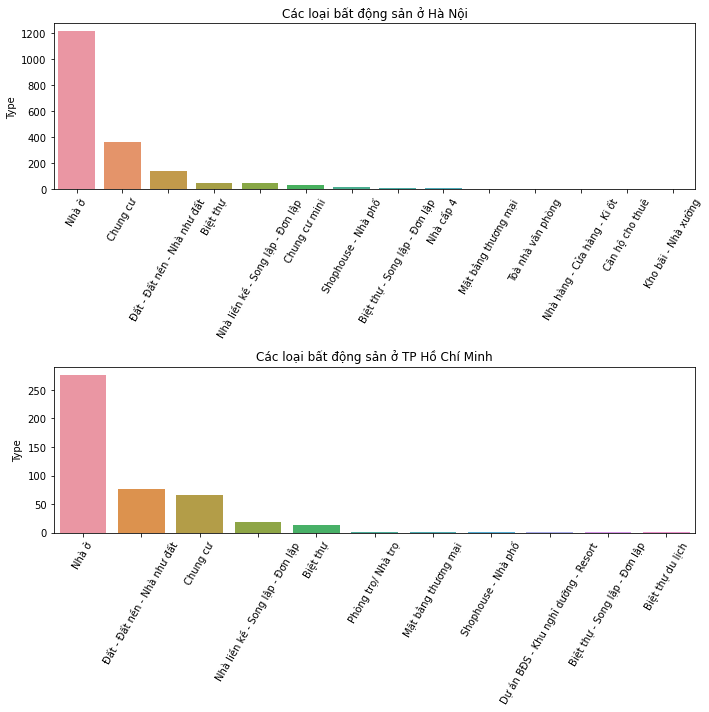

In [52]:
fig, ax = plt.subplots(2,1,figsize=(10,10))
sns.barplot(x=df_hanoi['Type'].dropna().value_counts().index.tolist(),y =df_hanoi['Type'].value_counts(), ax=ax[0]).set_title('Các loại bất động sản ở Hà Nội')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=60)
sns.barplot(x=df_hcm['Type'].dropna().value_counts().index.tolist(),y =df_hcm['Type'].value_counts(), ax=ax[1]).set_title('Các loại bất động sản ở TP Hồ Chí Minh')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=60)
plt.tight_layout()
plt.show()

- Số bất động sản ở Hà Nội cao hơn nhiều so với TP Hồ Chí Minh. 
- Giá BĐS trung bình ở ngoại thành Hà Nội cao hơn đáng kể so với ngoại thành TP Hồ Chí Minh
- Giá trung bình mỗi BĐS ở ngoại thành TP Hồ Chí Minh cao hơn.
- Diện tích mỗi BĐS ở Hà Nội nhỏ hơn nhiều so với TP Hồ Chí Minh.


+ Kết luận: Thị trường bất động sản ở ngoại thành Hà Nội phát triển hơn TP Hồ Chí Minh nhưng TP HCM có nhiều tiềm năng phát triẻn hơn


## Bonus - Phân tích triển vọng phát triển bất động sản ở TP HCM và Hà Nội

- Dựa vào các thông tin đã phân tích, ta có thể rút ra các kết luận:
    + Hà Nội:
    - Thị trường bất động sản đã phát triển tương đối hoàn chỉnh
    - Giá khá cao
    - Các loại hình bất động sản truyền thống (như nhà ở,...) được yêu thích
    - Các bất động sản chưa được quy hoạch tốt để đem lại hiệu quả kinh tế cao nhất
    + TP Hồ Chí Minh:
    - Trị trường bất động sản đang phát triển nhanh và được quy hoạch tốt
    - Chấp nhận các loại hình bất động sản mới phù hợp với tình trạng dân số ngày càng đông
    - Các bất động sản có khả năng sinh lời cao vì thị trường còn có thể phát triển và được quy hoạch tốt
    - Vùng ven còn nhiều quỹ đất và chưa được quy hoạch 
    - Nhu cầu mua BĐS để sử dụng cao hơn (loại hình căn hộ được ưa chuộng)
- Ta có thể đưa ra các kết luận:
    + Thị trường bất động sản ở TP Hồ Chí Minh sẽ phát triển mạnh hơn Hà Nội trong thời gian tới và có thể vượt qua Hà Nội vì quy hoạch hiệu quả cũng như nhu cầu thực tế cao hơn
    + Thị trường bất động sản ở các khu trung tâm Hà Nội và TP Hồ Chí Minh tăng trưởng chậm nhưng bền vững. Hình thức bất động sản ở trung tâm trong thời gian tới sẽ là các bất động sản có quy mô lớn (như chung cư, trung tâm thương mại,...) vì hình thức bất động sản này sinh lời nhiều và đáp ứng tốt các nhu cầu sinh hoạt hiện đại.
    + Thị trường bất động sản ở vùng ve TP Hồ Chí Minh sẽ phát triển rất mạnh trong thời gian tới vì khu vực trung tâm hết nguồn cung trong khi cầu vẫn còn và các công trình an sinh xã hội đang dần được hoàn thiện. Giá bất động sản ở khu vực vùng ven TP Hồ Chí Minh vì thế cũng sẽ có mức tăng mạnh trong nhiều năm tới.
    + Giá nhà ở Hà Nội thời gian tới có thể sẽ không tăng mạnh bằng giá chung cư khi nhu cầu thực ở của người dân Hà Nội cao hơn vì chung cư đáp ứng nhu cầu thực ở tốt và hiện đang có mức giá khá tốt.

# Phân tích dữ liệu

*Từ phần này ta chỉ áp dụng với dữ liệu là nhà ở, chung cư, chung cư mini, nhà cấp 4*

In [53]:
types = ['Nhà ở', 'Chung cư', 'Chung cư mini', 'Nhà cấp 4']
house = new_data.loc[(new_data['Type']).isin(types)]
house.drop(['Price(million/m_square)', 'Saler'], axis=1, inplace=True)
house.head(2)

,Price,Location,Area,Street,Facade,Direction,Type,Floor,Bathrooms,Bedrooms,Legal Doc
0,4.75,"Quận Sơn Trà, Thành phố Đà Nẵng",90.0,Mặt phố - Mặt đường,5.0,Đông Bắc,Nhà ở,NaN,NaN,2.0,NaN
3,0.77,"Quận Thanh Xuân, Thành phố Hà Nội",55.0,Ngõ 1 ô tô,NaN,NaN,Chung cư mini,NaN,NaN,NaN,"Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Hợp đồng mua bán"


## Thống kê mô tả

### Bảng mô tả tính chất thuộc tính numeric

In [54]:
numeric_cols_df = house.select_dtypes(exclude='object')

def median(col):
    return col.quantile(0.5)

def lower_quantile(col):
    return col.quantile(0.25)

def upper_quantile(col):
    return col.quantile(0.75)

numeric_cols_df.agg([missing_ratio, min, median, lower_quantile, upper_quantile,max])

,Price,Area,Facade,Floor,Bathrooms,Bedrooms
missing_ratio,0.000000e+00,0.425532,45.831363,93.680063,70.606777,33.617021
min,1.100000e-03,7.000000,1.000000,1.000000,1.000000,1.000000
median,4.150000e+00,54.000000,4.500000,4.000000,3.000000,3.000000
lower_quantile,2.700000e+00,40.000000,4.000000,3.000000,2.000000,2.000000
upper_quantile,6.600000e+00,76.500000,5.300000,5.000000,4.000000,4.000000
max,2.260000e+06,20998.000000,313.600000,50.000000,50.000000,111.000000


### Mô tả tính chất của thuộc tính kiểu category

In [55]:
cat_col_df = house.select_dtypes(include='object')

def missing_ratio(col):
    return col.isna().mean()*100

def top10_value_counts(col):
    return dict(col.value_counts()[:10])

category_stat = cat_col_df.agg([missing_ratio, pd.Series.nunique, top10_value_counts])
pd.set_option('display.max_colwidth', 1000)
category_stat

,Location,Street,Direction,Type,Legal Doc
missing_ratio,0,10.0236,83.4358,0,12.6872
nunique,163,8,30,4,12
top10_value_counts,"{'Quận Hà Đông, Thành phố Hà Nội': 543, 'Quận Đống Đa, Thành phố Hà Nội': 526, 'Quận Thanh Xuân, Thành phố Hà Nội': 482, 'Quận Cầu Giấy, Thành phố Hà Nội': 399, 'Quận Hoàng Mai, Thành phố Hà Nội': 336, 'Quận Bắc Từ Liêm, Thành phố Hà Nội': 286, 'Quận Hai Bà Trưng, Thành phố Hà Nội': 282, 'Quận Gò Vấp, Thành phố Hồ Chí Minh': 245, 'Quận Nam Từ Liêm, Thành phố Hà Nội': 227, 'Quận Long Biên, Thành phố Hà Nội': 227}","{'Ngõ ngách': 1321, 'Mặt phố - Mặt đường': 1306, 'Ngõ ô tô đỗ cửa': 1234, 'Ngõ 2 ô tô tránh': 899, 'Ngõ 1 ô tô': 816, 'Ngõ 3 ô tô tránh': 113, 'Ngõ 4 ô tô trở lên': 14, 'Ngõ 4 ô tô tránh': 6}","{'Đông Nam': 229, 'Tây Bắc': 148, 'Đông Bắc': 139, 'Tây Nam': 124, 'Nam': 92, 'Đông Tứ Trạch': 67, 'Bắc': 62, 'Đông': 59, 'Tây Tứ Trạch': 52, 'Tây': 37}","{'Nhà ở': 5263, 'Chung cư': 856, 'Chung cư mini': 155, 'Nhà cấp 4': 71}","{'Giấy CN QSDĐ - Sổ đỏ - Sổ hồng': 5171, 'Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Hợp đồng mua bán': 230, 'Hợp đồng mua bán': 121, 'Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Hợp đồng mua bán, Giấy tờ chứng minh nguồn gốc': 4, 'Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Hợp đồng mua bán, Hợp đồng góp vốn': 3, 'Đã có giấy hẹn lấy số': 3, 'Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Giấy tờ chứng minh nguồn gốc': 2, 'Đang làm giấy CN QSDĐ': 2, 'Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Chưa làm giấy CN QSDĐ': 1, 'Đất giao - Đất phân, Giấy tờ chứng minh nguồn gốc': 1}"


- Ta thấy rằng tỉ lệ giá trị thiếu ở các thuộc tính Floor, Bathrooms và Direction là khá lớn nên ta sẽ bỏ các thuộc tính này

In [56]:
house.drop(['Floor', 'Bathrooms', 'Direction'], axis=1, inplace=True)

## Trực quan để kiểm tra phân phối của thuộc tính

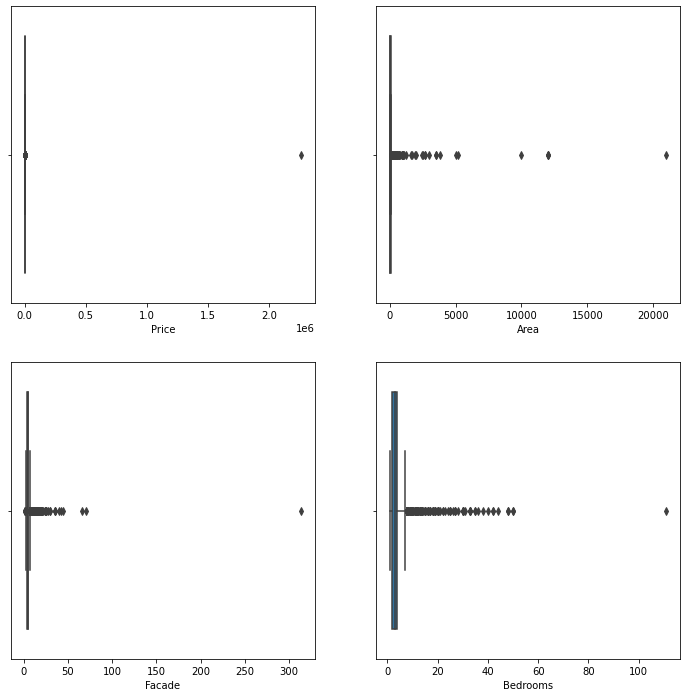

In [59]:
fig, ax = plt.subplots(2,2,figsize=(12,12))
sns.boxplot(x='Price', data=house, ax=ax[0][0])
sns.boxplot(x='Area', data=house, ax=ax[0][1])
sns.boxplot(x='Facade', data=house, ax=ax[1][0])
sns.boxplot(x='Bedrooms', data=house, ax=ax[1][1])
plt.show()

- Các giá trị ngoại lai làm tập dữ liệu bị lệch phải và điều này sẽ làm ảnh hưởng đến độ chính xác của mô hình

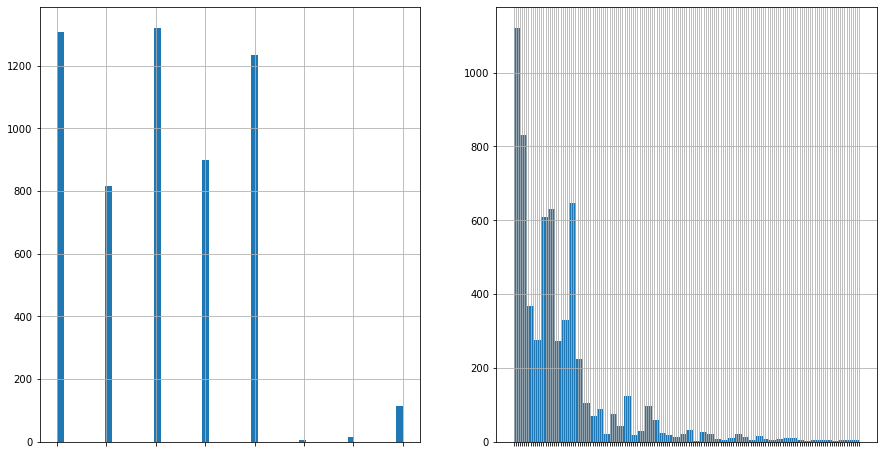

In [60]:
fig, ax = plt.subplots(1,2,figsize=(15,8))
house['Street'].hist(bins=50, ax=ax[0]).set_xticklabels([])
house['Location'].hist(bins=50, ax=ax[1])
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.show()

[]

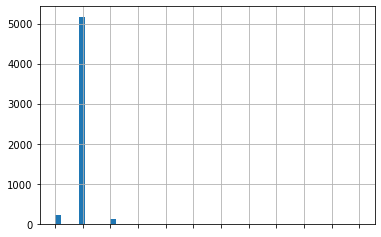

In [61]:
house['Legal Doc'].hist(bins=50).set_xticklabels([])

- Trong các thuộc tính Street và Legal Doc, một số giá trị có tần suất xuất hiện khá thấp

#### Giải thích hàm clipper

- Các giá trị ngoại lai ảnh hướng rất lớn đến chất lượng mô hình Machine Learning
- Dùng phương pháp chặn trên chặn dưới để xử lý các giá trị ngoại lai
- Ta sẽ lấy chặn trên là giá trị maximum của boxplot, chặn dưới là giá trị minimum của boxplot
- Sau đó ta sẽ tiến hành clip các giá trị vào [minimum, maximum] (giá trị nhỏ hơn minimum sẽ gán bằng minimum, giá trị lớn hơn maximum sẽ gán bằng maximum)

In [62]:
def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

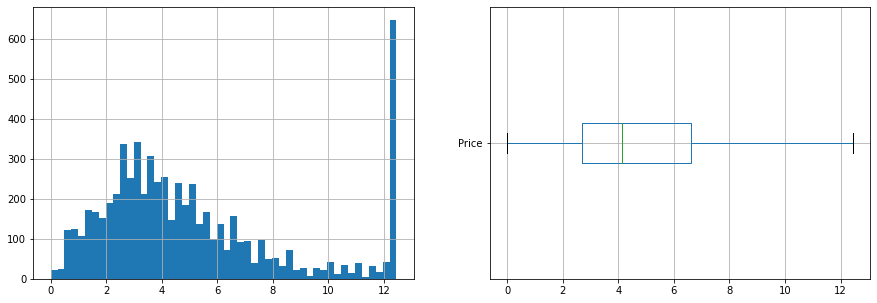

In [63]:
clipped_price = BoxplotOutlierClipper().fit_transform(house["Price"])

fig, axes = plt.subplots(1,2, figsize=(15, 5))
clipped_price.hist(bins=50, ax=axes[0])
clipped_price.to_frame().boxplot(ax=axes[1], vert=False);

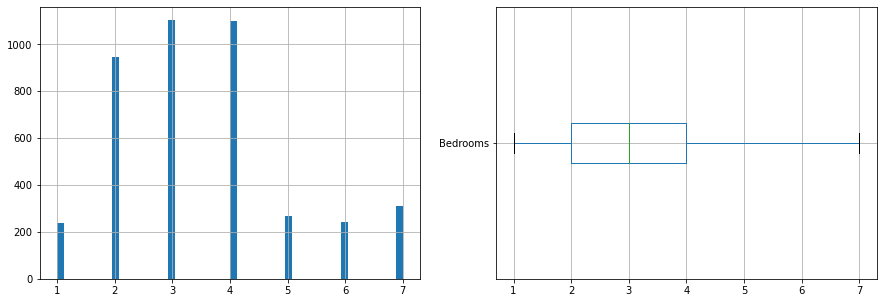

In [64]:
clipped_bedrooms = BoxplotOutlierClipper().fit_transform(house["Bedrooms"])

fig, axes = plt.subplots(1,2, figsize=(15, 5))
clipped_bedrooms.hist(bins=50, ax=axes[0])
clipped_bedrooms.to_frame().boxplot(ax=axes[1], vert=False);

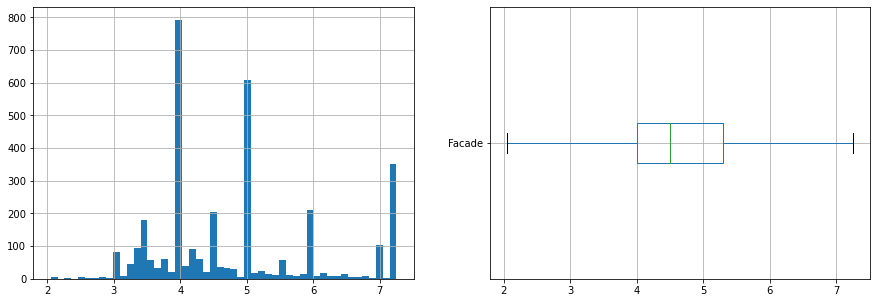

In [65]:
clipped_facade = BoxplotOutlierClipper().fit_transform(house["Facade"])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
clipped_facade.hist(bins=50, ax=axes[0])
clipped_facade.to_frame().boxplot(ax=axes[1], vert=False);

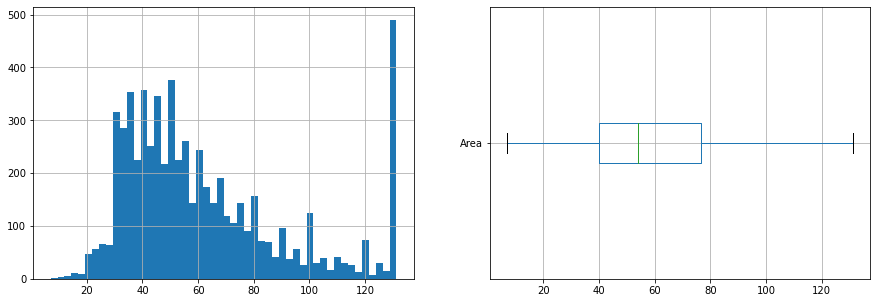

In [66]:
clipped_area = BoxplotOutlierClipper().fit_transform(house["Area"])

fig, axes = plt.subplots(1,2, figsize=(15, 5))
clipped_area.hist(bins=50, ax=axes[0])
clipped_area.to_frame().boxplot(ax=axes[1], vert=False);

- Sau khi clip dữ liệu theo cực tiểu và cực đại của box plot, ta thấy rằng dữ liệu đỡ bị lệch đi. Box plot cũng cho thấy không còn điểm dữ liệu ngoại lệ nào

#### Gán lại giá trị đã clip

In [67]:
house['Price'] = clipped_price
house['Area'] = clipped_area
house['Facade'] = clipped_facade
house['Bedrooms'] = clipped_bedrooms

In [68]:
house.describe()

,Price,Area,Facade,Bedrooms
count,6345.000000,6318.000000,3437.000000,4212.000000
mean,5.135749,62.316390,4.808598,3.516619
std,3.400777,29.986409,1.214321,1.549457
min,0.001100,7.000000,2.050000,1.000000
25%,2.700000,40.000000,4.000000,2.000000
50%,4.150000,54.000000,4.500000,3.000000
75%,6.600000,76.500000,5.300000,4.000000
max,12.450000,131.250000,7.250000,7.000000


## Xây dựng pipeline xử lý dữ liệu

In [69]:
class MyLEncoder():
    def __init__(self, key=[]):
        self.key = []
        self.size= (0,0)
    def transform(self, X, y=None, **fit_params):
        new_X = X.copy().reshape(-1)
        enc = LabelEncoder()
        self.fit(X, y, **fit_params)
        enc = enc.fit(new_X)
        self.classes=enc.classes_
        
        return enc.transform(new_X).reshape(self.size)

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

    def fit(self, X, y=None, **fit_params):
        # self.key = list(X.columns)
        self.size=X.shape        
        return self


In [70]:
# get top values with give count

class GetTop():
    def __init__(self, num_top = 10):
        self.num = num_top
    def fit(self, X, y=None, **fit_params):
        # self.values = X.apply(lambda x:x.value_counts().key())
        self.keys = list(X.select_dtypes(include='object').columns)
        # self.keys = list(X.columns)
        self.keys.remove('Location')
        self.top_dict = dict.fromkeys(list(self.keys), None)

        for each in self.keys:
            count = min(self.num, X[each].nunique())
            self.top_dict[each] = list(X[each].value_counts().keys())[:count]

        return self

    def transform(self, X, y=None, **fit_params):
        # self.fit(X, y, **fit_params)
        new_X = X.copy()
        
        for col in self.keys:
            new_X.loc[(~new_X[col].isin(self.top_dict[col])) & (new_X[col]!=np.nan), col] ='other'

        return pd.DataFrame(new_X)

    def fit_transform(self, X, y=None,**fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X, y, **fit_params)

In [71]:
num_col = ['Area', 'Facade', 'Bedrooms']
cate_col = ['Location', 'Street', 'Type', 'Legal Doc']

In [72]:
cate_imputer=Pipeline(steps=[('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')), ('encoder', MyLEncoder())])
rem_num_col = list(set(num_col) - set(['Floor', 'Bathrooms', 'Bedrooms']))

In [73]:
transfer = ColumnTransformer([('num', SimpleImputer(missing_values=np.nan, strategy='mean'), num_col),
                              ('cate', cate_imputer, cate_col)], remainder='drop')

In [74]:
p = Pipeline(steps=[('get_top', GetTop()), ('transfer', transfer), ('scaler', StandardScaler())])
p

Pipeline(steps=[('get_top', <__main__.GetTop object at 0x0000029602109370>),
                ('transfer',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Area', 'Facade',
                                                   'Bedrooms']),
                                                 ('cate',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   <__main__.MyLEncoder object at 0x0000029602D480A0>)]),
                                                  ['Location', 'Street', 'Type',
                                                   'Legal Doc'])])),
                ('scaler', StandardScaler())])

In [75]:
a = p.fit_transform(house).round(4)
scale_df = pd.DataFrame(a, columns = num_col+ cate_col)
scale_df

,Area,Facade,Bedrooms,Location,Street,Type,Legal Doc
0,0.9252,0.2142,-1.2015,0.3305,-0.4425,0.4358,2.5735
1,-0.2445,-0.0000,0.0000,0.4051,-0.4105,-2.2693,-0.3568
2,-0.3782,-0.0000,0.0000,2.3817,-0.4425,-2.3019,-0.4065
3,-0.2111,-0.0000,0.0000,0.5915,-0.4105,-2.2693,-0.3568
4,-1.0801,-0.0000,-0.4093,0.1440,-0.2504,0.4358,-0.4065
...,...,...,...,...,...,...,...
6340,-0.2445,-1.4644,-1.2015,-0.3036,-0.4105,0.4358,-0.4065
6341,0.9252,-0.3453,-0.4093,0.2559,-0.4425,0.4358,-0.4065
6342,-0.6456,1.3333,-1.2015,0.2559,-0.4105,0.4358,-0.4065
6343,-0.9798,-0.0000,0.0000,-0.1544,-0.3785,0.4358,-0.4065


## Phân tích hồi quy bằng mô hình OLS

In [76]:
y = house['Price'].reset_index(drop=True)
y

0       4.75
1       0.77
2       1.90
3       0.66
4       2.60
        ... 
6340    5.45
6341    4.29
6342    2.25
6343    1.10
6344    8.50
Name: Price, Length: 6345, dtype: float64

In [77]:
X = sm.add_constant(scale_df)
X.shape

(6345, 8)

In [78]:
result = sm.OLS(y, X).fit()

In [79]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     543.0
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:20:43   Log-Likelihood:                -15278.
No. Observations:                6345   AIC:                         3.057e+04
Df Residuals:                    6337   BIC:                         3.063e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1358      0.034    152.067      0.000       5.070       5.202
Area           1.2678      0.038     32.968      0.000       1.192       1.343
Facade         0.2495      0.038      6.617      0.000       0.176       0.323
Bedrooms       0.8478      0.036     23.674      0.000       0.778       0.918
Location       0.1207      0.034      3.566      0.000       0.054       0.187
Street         0.0029      0.037      0.078      0.938      -0.069       0.075
Type           1.0626      0.036     29.364      0.000       0.992       1.133
Legal Doc     -0.0891      0.036     -2.450      0.014      -0.160      -0.018
==============================================================================
Omnibus:                      338.024   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              742.401
Skew:                           0.350   Prob(JB):                    6.16e-162
Kurtosis:                       4.522   Cond. No.                         1.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nhìn vào bảng trên, ta thấy:
- Số mẫu quan sát là 6345
- Số mô hình là 7
- $r^2$ là 0.375
- $r$ bình phương hiệu chỉnh là 0.374, nghĩa là các biến độc lập giải thích được **37.4%** biến thiên của biến phụ thuộc (rất thấp)
- sai số chuẩn
- coef là giá trị hệ số hồi quy chưa chuẩn hóa
- P>|t| là p-value. Nếu giá trị này bé hơn 5% thì mối quan hệ giữa biến độc lập và biến phụ thuộc có ý nghĩa.
- Skew: độ lệch
- F-Statistic = 543.0 là giá trị kiểm định của 7 nhân tố là 6337 bậc tự do
- Prob (F-statistic) = 0.00, điều này cho thấy tổng thể hồi quy là có ý nghĩa
- Prob (Omnibus): Một trong những giả thuyết của OLS là các lỗi được phân phối chuẩn. Trong trường hợp này Prob (Omnibus) là 0.000, có nghĩa là giả thuyết OLS không được thỏa mãn, độ lỗi không có phân phối chuẩn

$\rightarrow$ Dựa vào bảng trên, ngoài biến **Street**, mối quan hệ giữa biến phụ thuộc **Price** và các biến còn lại đều có ý nghĩa thống kê

## Dự đoán giá nhà ở, chung cư bằng các mô hình máy học

### Chia thành các tập huấn luyện và kiểm tra

In [80]:
#  Loại bỏ các cột không có ý nghĩa thông kê
X_df = scale_df.drop(['Street'], axis=1)

In [81]:
X_train, X_temp, y_train, y_temp = train_test_split(scale_df, y, test_size=0.4, random_state=2200)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=2200)

In [82]:
X_train.shape

(3807, 7)

In [83]:
X_val.shape

(1269, 7)

In [84]:
X_test.shape

(1269, 7)

In [85]:
y_train.shape

(3807,)

In [86]:
y_val.shape

(1269,)

In [87]:
y_test.shape

(1269,)

### Áp dụng các mô hình máy học

### Linear Regression

In [88]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [89]:
lr.score(X_val, y_val)

0.3558062258732081

### XGBoost

In [90]:
xgb_reg = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             subsample=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [91]:
xgb_reg.score(X_val, y_val)

0.685550196940323

### MLP Regressor

In [92]:
regr = MLPRegressor(activation='relu', 
                    alpha=0.0001,
                    batch_size='auto',
                    hidden_layer_sizes= 100,
                    learning_rate= 'constant',
                    learning_rate_init= 0.001,
                    max_iter= 500,
                    solver= 'lbfgs')
regr.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=100, max_iter=500, solver='lbfgs')

In [93]:
regr.score(X_val, y_val)

0.5300021382739158

### Mô hình SVR

In [94]:
svr = SVR(C=1.0, epsilon=0.2, kernel='rbf')
svr.fit(X_train, y_train)

SVR(epsilon=0.2)

In [95]:
svr.score(X_val, y_val)

0.5187401754862649

- Mô hình cho độ chính xác tốt nhất là XGBoost Regressor nên ta sẽ sử dụng model này cho việc dự đoán trên tập test

## **Mô hình áp dụng: XGBoost**

In [96]:
xgb_reg.score(X_test, y_test)

0.6587456961698666